# Density and openness statistics

### Python imports

In [1]:
import sys, os, math, numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path=r'python_functions'
sys.path.append(path)
import utils_borehole as uB

In [2]:
#ignore python warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

### Import fracture dataset

In [3]:
# data inputs 
input_folder = r'input_data'
filename = 'p_frac_core_select'
all_data = pd.read_csv(os.path.join(input_folder,filename+str('.txt')), sep = ';')
all_data = all_data.sort_values(by = ['IDCODE','ADJUSTEDSECUP(m)']) #we make sure that the adjusted secup is in the right order

## 1) By borehole

In [4]:
# borehole list
b_list = all_data.IDCODE.unique()
print(b_list)

# to store fop, p32, and length
p32s = []
fops = []
blengths = []

['KFM01A' 'KFM01B' 'KFM01C' 'KFM01D' 'KFM02A' 'KFM02B' 'KFM03A' 'KFM03B'
 'KFM04A' 'KFM05A' 'KFM06A' 'KFM06B' 'KFM06C' 'KFM07A' 'KFM07B' 'KFM07C'
 'KFM08A' 'KFM08B' 'KFM08C' 'KFM08D' 'KFM09A' 'KFM09B' 'KFM10A' 'KFM11A'
 'KFM12A' 'KFM13' 'KFM14' 'KFM15' 'KFM16' 'KFM17' 'KFM18' 'KFM19' 'KFM20'
 'KFM21' 'KFM22' 'KFM23' 'KFM90B' 'KFM90C' 'KFM90D' 'KFM90E' 'KFM90F']


We loop over each borehole and retrieve the density p32 and the openness fop :

In [5]:
for borehole in b_list:
    #select borehole data
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    
    # borehole analyser
    b_analysis = uB.BoreholeAnalysis(b_data)
    
    p32s.append(b_analysis.p32)
    fops.append(b_analysis.fop)
    blengths.append(b_analysis.b_length)
    
#convert to numpy arrays
p32s = np.array(p32s)
fops = np.array(fops)
blengths = np.array(blengths)

We also compute p32 and fop of the entire dataset :

In [6]:
p32_all = np.sum(blengths*p32s)/np.sum(blengths)
fop_all = np.sum(blengths*p32s*fops)/np.sum(blengths*p32s)

print(p32_all)
print(fop_all)

11.592851255090572
0.22462468848595663


Bar plots:

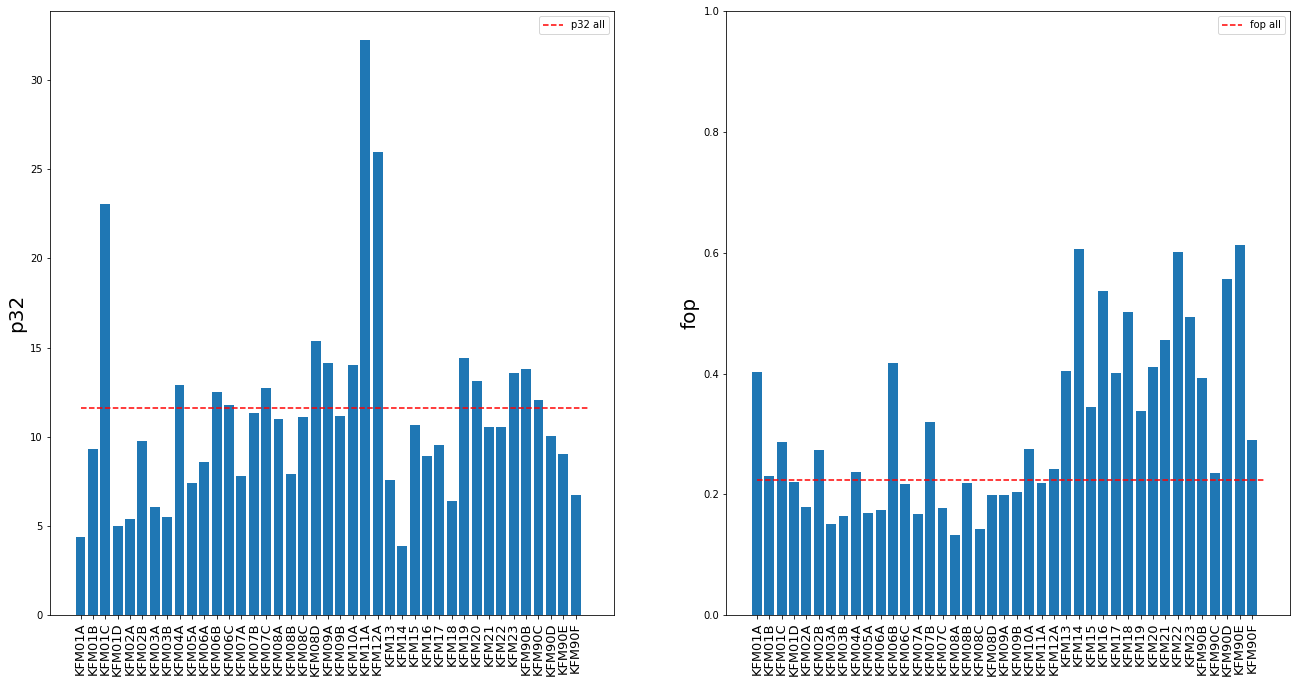

In [7]:
fig = plt.figure()
# p32
ax = fig.add_subplot(131)
ax.bar(b_list,p32s)
ax.tick_params(axis="x", labelsize=13, rotation = 90)
ax.set_ylabel('p32', fontsize = 20)
ax.hlines(p32_all, 0, len(b_list), colors = 'red', linestyle = 'dashed', label = 'p32 all')
ax.legend()
#fop
ax2 = fig.add_subplot(132)
ax2.bar(b_list,fops)
ax2.tick_params(axis="x", labelsize=13, rotation = 90)
ax2.set_ylabel('fop', fontsize = 20)
ax2.set_ylim(0,1)
ax2.hlines(fop_all, 0, len(b_list), colors = 'red', linestyle = 'dashed', label = 'fop all')
ax2.legend()

fig.set_size_inches(1600./fig.dpi,800./fig.dpi)
plt.show()

## 2) By fracture domain

Fracture domain list:

In [8]:
FFM_list = ['FFM01','FFM02','FFM03','FFM04','FFM05','FFM06']

In [9]:
# to store the FFM fop, p32, and length
FFM_p32s = []
FFM_fops = []

For each Fracture Domain, we loop over each borehole and retrieve the density p32 and the openness fop :

In [10]:
for FFM in FFM_list:
   #to store the FFM stats by borehole 
    b_p32s = []
    b_fops = []
    b_length = []
    for borehole in b_list:
        # select borehole data
        b_data = all_data.loc[all_data['IDCODE'] == borehole]
        # borehole analyser
        b_analysis = uB.BoreholeAnalysis(b_data)
        # we use the attribute lithology_type and lithology_name:
        b_p32s.append(b_analysis.get_p32(lithology_type = 'FRACTURE_DOMAIN', lithology_name = FFM))
        b_fops.append(b_analysis.get_fop(lithology_type = 'FRACTURE_DOMAIN', lithology_name = FFM))
        b_length.append(b_analysis.get_length(lithology_type = 'FRACTURE_DOMAIN', lithology_name = FFM))

    #convert to numpy arrays
    b_p32s = np.array(b_p32s)
    b_fops = np.array(b_fops)
    b_length = np.array(b_length)
    
    #compute the FFM overall p32 and fop
    p32 = np.nansum(b_length*b_p32s)/np.sum(b_length)
    FFM_p32s.append(p32)
    fop = np.nansum(b_length*b_p32s*b_fops)/np.nansum(b_length*b_p32s)
    FFM_fops.append(fop)
    
    print(FFM)
    print('p32 :'+ str(p32))
    print('fop :'+ str(fop))    

FFM01
p32 :5.194762824496667
fop :0.14365609966411405
FFM02
p32 :9.692751876964829
fop :0.3499041328316464
FFM03
p32 :6.568816298483683
fop :0.1490839304783663
FFM04
p32 :16.284084377459436
fop :0.19463651594186882
FFM05
p32 :12.41909044483257
fop :0.15555930697222148
FFM06
p32 :9.950854246723566
fop :0.15123786640024273


Compute the fracture domain average fop, p32:

In [11]:
b_p32s = []
b_fops = []
b_length = []
for borehole in b_list:
    # select borehole data
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    # borehole analyser
    b_analysis = uB.BoreholeAnalysis(b_data)
    # we use the attribute lithology_type and lithology_name:
    b_p32s.append(b_analysis.get_p32(lithology_type = 'FRACTURE_DOMAIN'))
    b_fops.append(b_analysis.get_fop(lithology_type = 'FRACTURE_DOMAIN'))
    b_length.append(b_analysis.get_length(lithology_type = 'FRACTURE_DOMAIN'))

#convert to numpy arrays
b_p32s = np.array(b_p32s)
b_fops = np.array(b_fops)
b_length = np.array(b_length)

#compute the FFM overall p32 and fop
p32_all = np.nansum(b_length*b_p32s)/np.sum(b_length)
fop_all = np.nansum(b_length*b_p32s*b_fops)/np.nansum(b_length*b_p32s)

Bar plots:

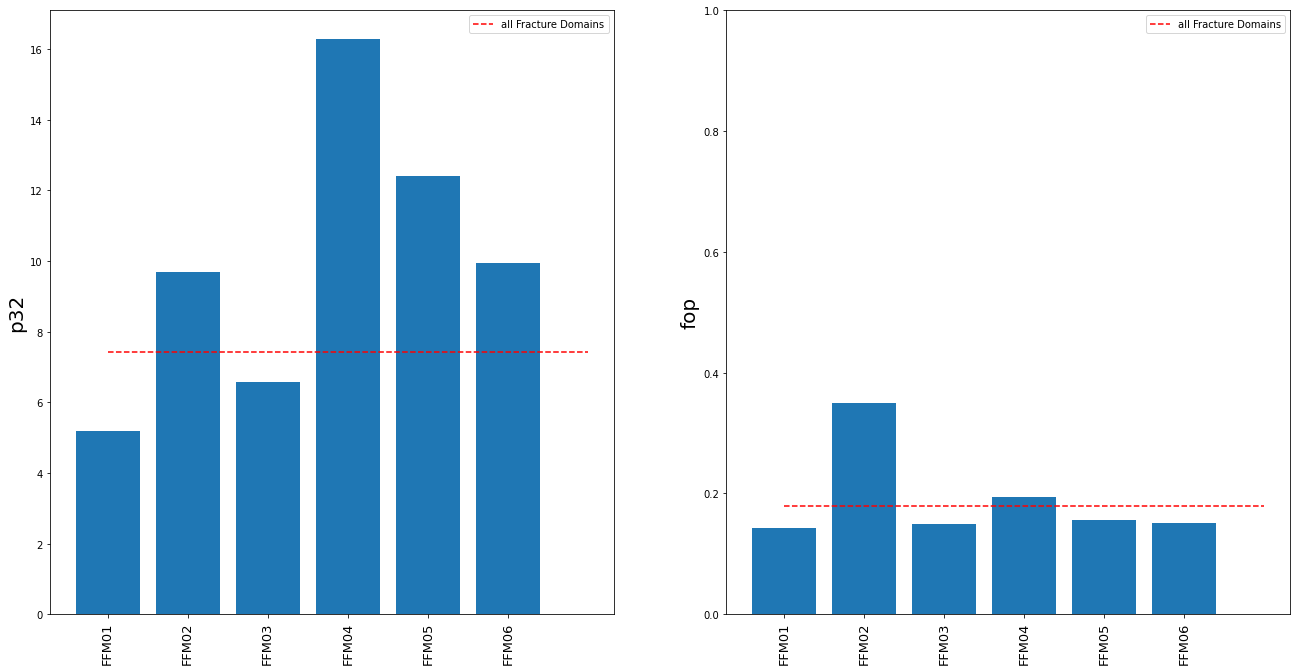

In [12]:
fig = plt.figure()
# p32
ax = fig.add_subplot(121)
ax.bar(FFM_list,FFM_p32s)
ax.tick_params(axis="x", labelsize=13, rotation = 90)
ax.set_ylabel('p32', fontsize = 20)
ax.hlines(p32_all, 0, len(FFM_list), colors='red', linestyles='dashed', label = 'all Fracture Domains')
ax.legend()
# fop
ax2 = fig.add_subplot(122)
ax2.bar(FFM_list,FFM_fops)
ax2.tick_params(axis="x", labelsize=13, rotation = 90)
ax2.set_ylabel('fop', fontsize = 20)
ax2.set_ylim(0,1)
ax2.hlines(fop_all, 0, len(FFM_list), colors='red', linestyles='dashed', label = 'all Fracture Domains')
ax2.legend()

fig.set_size_inches(1600./fig.dpi,800./fig.dpi)
plt.show()

## 3) By Deformation Zones

In [13]:
DZ_list = all_data.DEFORMATION_ZONE.unique()
DZ_list = np.delete(DZ_list, 0)

In [14]:
# to store the FFM fop, p32, and length
DZ_p32s = []
DZ_fops = []

In [15]:
for DZ in DZ_list:
    #to store the FFM stats by borehole 
    b_p32s = []
    b_fops = []
    b_length = []
    for borehole in b_list:
        # select borehole data
        b_data = all_data.loc[all_data['IDCODE'] == borehole]
        # borehole analyser
        b_analysis = uB.BoreholeAnalysis(b_data)
        # we use the attribute lithology_type and lithology_name:
        b_p32s.append(b_analysis.get_p32(lithology_type = 'DEFORMATION_ZONE', lithology_name = DZ))
        b_fops.append(b_analysis.get_fop(lithology_type = 'DEFORMATION_ZONE', lithology_name = DZ))
        b_length.append(b_analysis.get_length(lithology_type = 'DEFORMATION_ZONE', lithology_name = DZ))

    #convert to numpy arrays
    b_p32s = np.array(b_p32s)
    b_fops = np.array(b_fops)
    b_length = np.array(b_length)
    
    #compute the FFM overall p32 and fop
    p32_all = np.nansum(b_length*b_p32s)/np.sum(b_length)
    DZ_p32s.append(p32_all)
    fop_all = np.nansum(b_length*b_p32s*b_fops)/np.nansum(b_length*b_p32s)
    DZ_fops.append(fop_all)
    
    #print(DZ)
   #print('p32 :'+ str(p32_all))
    #print('fop :'+ str(fop_all))    


Compute the deformation zone average fop, p32:

In [16]:
b_p32s = []
b_fops = []
b_length = []
for borehole in b_list:
    # select borehole data
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    # borehole analyser
    b_analysis = uB.BoreholeAnalysis(b_data)
    # we use the attribute lithology_type and lithology_name:
    b_p32s.append(b_analysis.get_p32(lithology_type = 'DEFORMATION_ZONE'))
    b_fops.append(b_analysis.get_fop(lithology_type = 'DEFORMATION_ZONE'))
    b_length.append(b_analysis.get_length(lithology_type = 'DEFORMATION_ZONE'))

#convert to numpy arrays
b_p32s = np.array(b_p32s)
b_fops = np.array(b_fops)
b_length = np.array(b_length)

#compute the FFM overall p32 and fop
p32_all = np.nansum(b_length*b_p32s)/np.sum(b_length)
fop_all = np.nansum(b_length*b_p32s*b_fops)/np.nansum(b_length*b_p32s)
print(p32_all)
print(fop_all)

16.903517086668387
0.2538902896626249


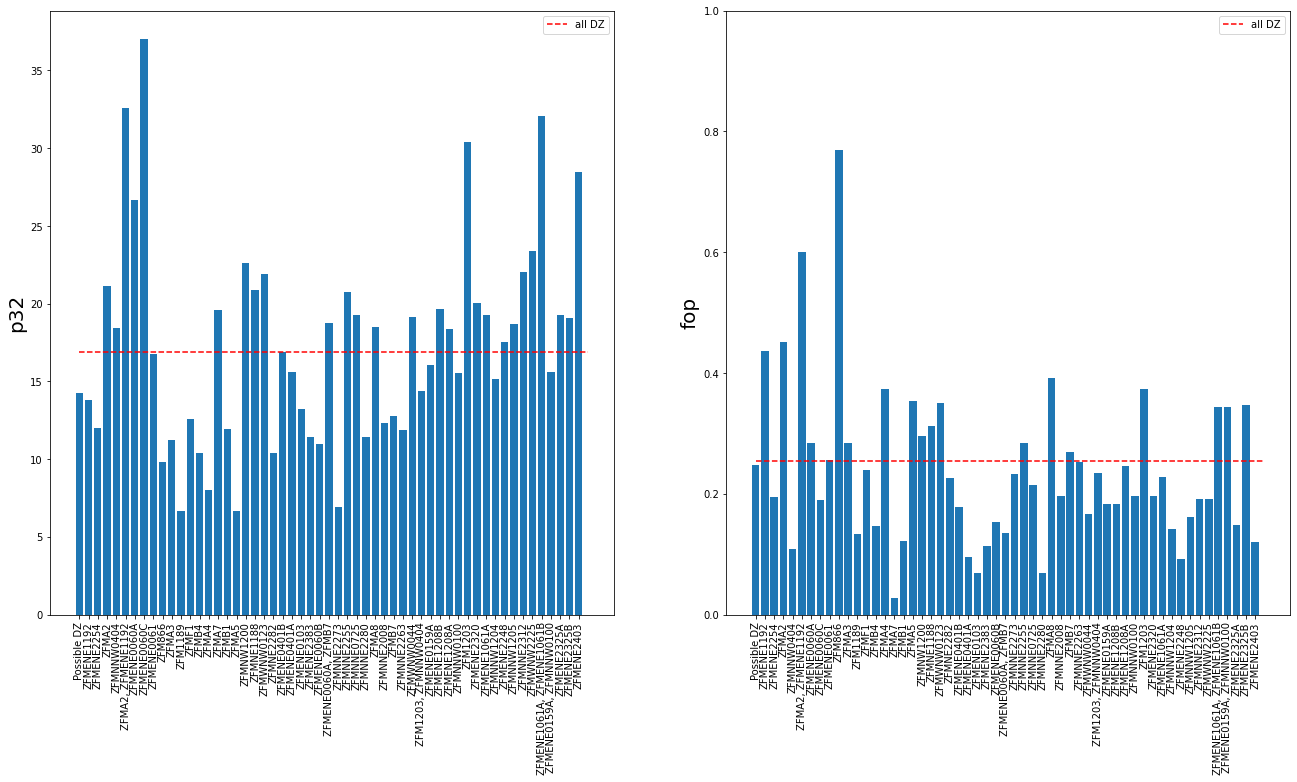

In [17]:
fig = plt.figure()
# p32
ax = fig.add_subplot(121)
ax.bar(DZ_list,DZ_p32s)
ax.tick_params(axis="x", labelsize=10, rotation = 90)
ax.set_ylabel('p32', fontsize = 20)
ax.hlines(p32_all, 0, len(DZ_list), colors='red', linestyles='dashed', label = 'all DZ')
ax.legend()
#fop
ax2 = fig.add_subplot(122)
ax2.bar(DZ_list,DZ_fops)
ax2.tick_params(axis="x", labelsize=10, rotation = 90)
ax2.set_ylabel('fop', fontsize = 20)
ax2.hlines(fop_all, 0, len(DZ_list), colors='red', linestyles='dashed', label = 'all DZ')
ax2.set_ylim(0,1)
ax2.legend()

fig.set_size_inches(1600./fig.dpi,800./fig.dpi)
plt.show()